<a href="https://colab.research.google.com/github/dj1550/Titanic-Survival-prediction-/blob/main/updated%20Titenic_Prediction_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Titanic Survival Prediction Model##

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Reading the data
path = "/content/drive/MyDrive/datasets/Titenic survival prediction data/Titanic-Dataset.csv"
data = pd.read_csv(path)

In [4]:
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Data Dictionary**



*  Survived: 0 = No, 1 = Yes
*  pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
*  sibsp: # of siblings / spouses aboard the Titanic
*  parch: # of parents / children aboard the Titanic
*   ticket: Ticket number
*   cabin: Cabin number
*  embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

**Total rows and columns**

We can see that there are 891 rows and 12 columns in our training dataset.

In [6]:
data.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***Data Visualization using Matplotlib and Seaborn packages.***


##Bar Chart for Categorical Features##




*   Sex
*   Pclass
*   SibSp ( # of siblings and spouse)
*   Parch ( # of parents and children)
*   Embarked
*   Cabin














In [9]:
def bar_chart(feature):
  survived=data[data['Survived']==1][feature].value_counts()
  not_survived=data[data['Survived']==0][feature].value_counts()
  df=pd.DataFrame([survived,not_survived])
  df.index = ['survived','Dead']
  return df.plot(kind='bar' , stacked=True, figsize=(4,4),)

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 male      468
female     81
Name: Sex, dtype: int64


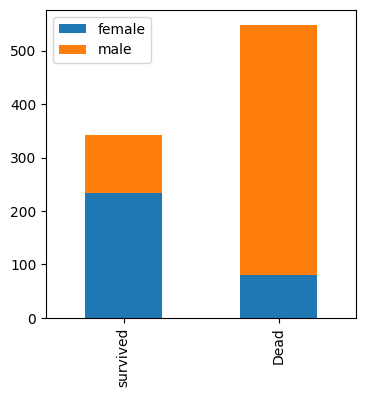

In [10]:
bar_chart('Sex')
print("Survived :\n",data[data['Survived']==1]['Sex'].value_counts())
print("Dead:\n",data[data['Survived']==0]['Sex'].value_counts())


The Chart confirms Women more likely survivied than Men.

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


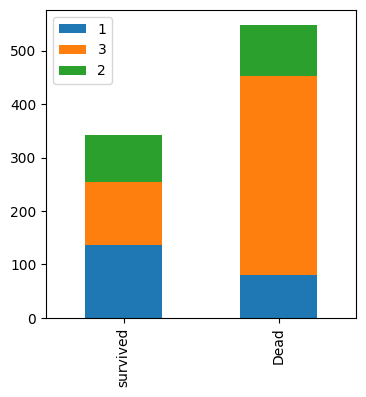

In [11]:
bar_chart('Pclass')
print("Survived :\n",data[data['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",data[data['Survived']==0]['Pclass'].value_counts())

The Chart confirms 1st class more likely survivied than other classes.

The Chart confirms 3rd class more likely dead than other classes

Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


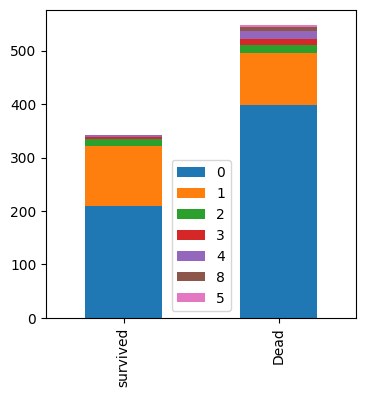

In [12]:
bar_chart('SibSp')
print("Survived :\n",data[data['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",data[data['Survived']==0]['SibSp'].value_counts())

The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived.

The Chart confirms a person aboarded without siblings or spouse more likely dead

Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


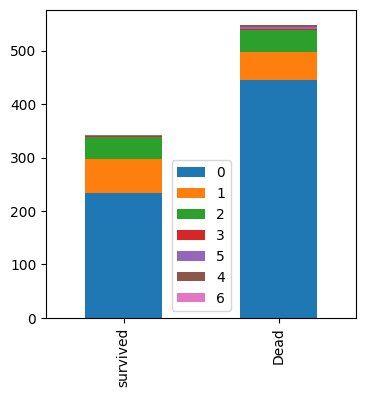

In [13]:
bar_chart('Parch')
print("Survived :\n",data[data['Survived']==1]['Parch'].value_counts())
print("Dead:\n",data[data['Survived']==0]['Parch'].value_counts())

The Chart confirms a person aboarded with more than 2 parents or children more likely survived.

The Chart confirms a person aboarded alone more likely dead

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


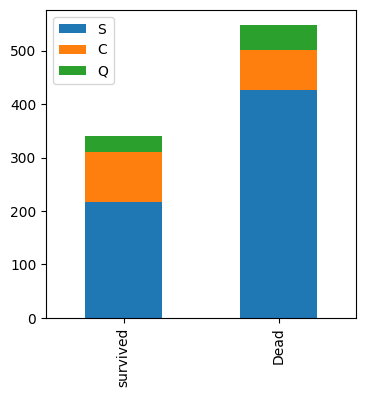

In [14]:
bar_chart('Embarked')
print("Survived :\n",data[data['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",data[data['Survived']==0]['Embarked'].value_counts())

The Chart confirms a person aboarded from C slightly more likely survived.

The Chart confirms a person aboarded from Q more likely dead.

The Chart confirms a person aboarded from S more likely dead.

Survived :
 B96 B98    4
E101       3
F33        3
B18        2
B20        2
          ..
C32        1
E34        1
C7         1
C54        1
C148       1
Name: Cabin, Length: 101, dtype: int64
Dead:
 G6             2
C22 C26        2
C23 C25 C27    2
F G73          2
D26            2
              ..
C91            1
C2             1
T              1
C128           1
B51 B53 B55    1
Name: Cabin, Length: 62, dtype: int64


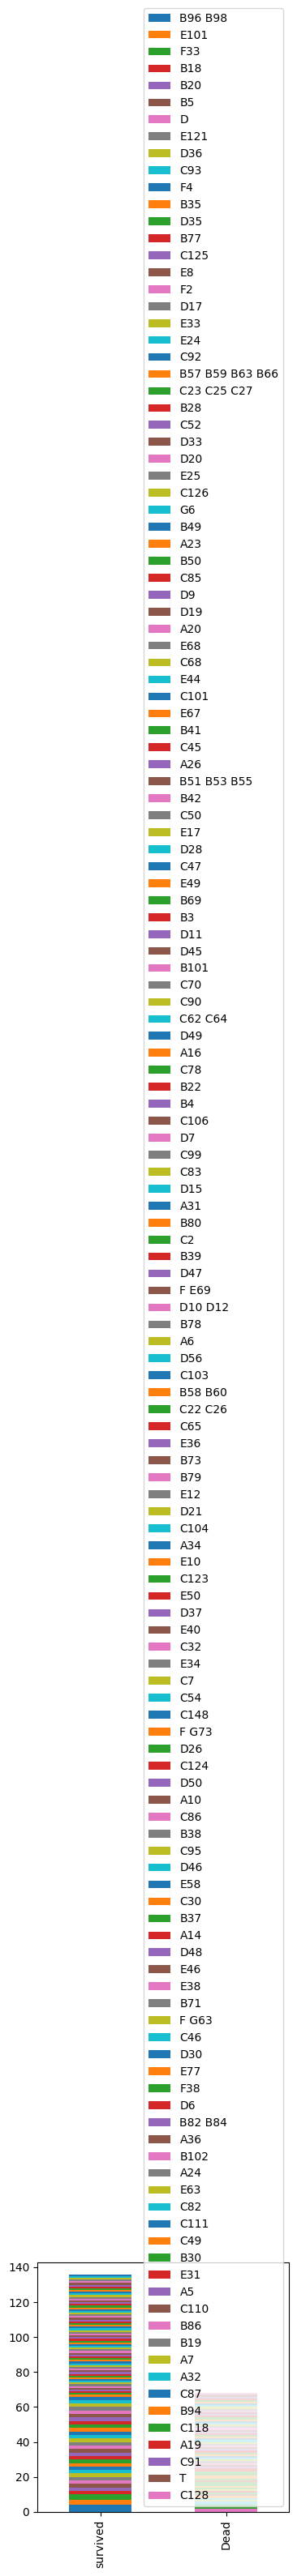

In [15]:
bar_chart('Cabin')
print("Survived :\n",data[data['Survived']==1]['Cabin'].value_counts())
print("Dead:\n",data[data['Survived']==0]['Cabin'].value_counts())

**Feature Engeenering And preprocessing of Data**

In [16]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [17]:
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [18]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

In [19]:
data['Title']=data['Title'].map(title_mapping)

<Axes: >

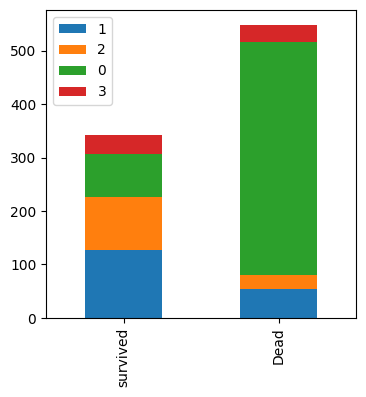

In [20]:
bar_chart('Title')

In [21]:
data.drop('Name', axis=1, inplace=True)

In [22]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [23]:
data['Sex']=data['Sex'].replace({'male':1,'female':0})

In [24]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0


In [25]:
data["Age"].fillna(data.groupby("Title")["Age"].transform("median"), inplace= True)

In [26]:
data.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,1,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,1,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,1,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,0,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,0,14.0,1,0,237736,30.0708,NaN,C,2


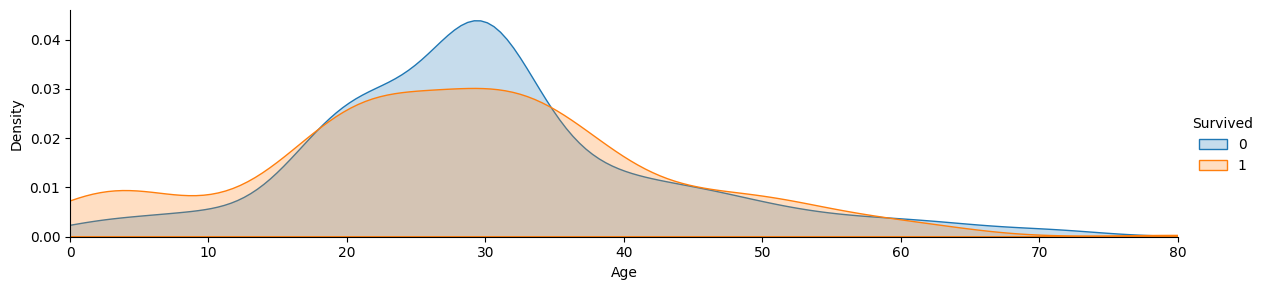

In [27]:
facet = sns.FacetGrid(data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()
plt.show()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


**Binning**

Binning/Converting Numerical Age to Categorical Variable

feature vector map:

*   child: 0
*   young: 1
*   adult: 2
*   mid-age: 3
*   senior: 4

In [29]:
# Define the bin edges and labels
bin_edges = [0, 16, 25, 40, 65, np.inf]
bin_labels = [0, 1, 2, 3 , 4]

# Apply pd.cut() to create the age groups
data['age_group'] = pd.cut(data['Age'], bins=bin_edges, labels=bin_labels, right=False)

# Display the first few rows to verify the changes
print(data[['Age', 'age_group']].head())

    Age age_group
0  22.0         1
1  38.0         2
2  26.0         2
3  35.0         2
4  35.0         2


In [30]:
data.drop('Age',axis=1,inplace=True)

In [31]:
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,age_group
0,1,0,3,1,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,0,1,0,PC 17599,71.2833,C85,C,2,2
2,3,1,3,0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,2
3,4,1,1,0,1,0,113803,53.1000,C123,S,2,2
4,5,0,3,1,0,0,373450,8.0500,NaN,S,0,2


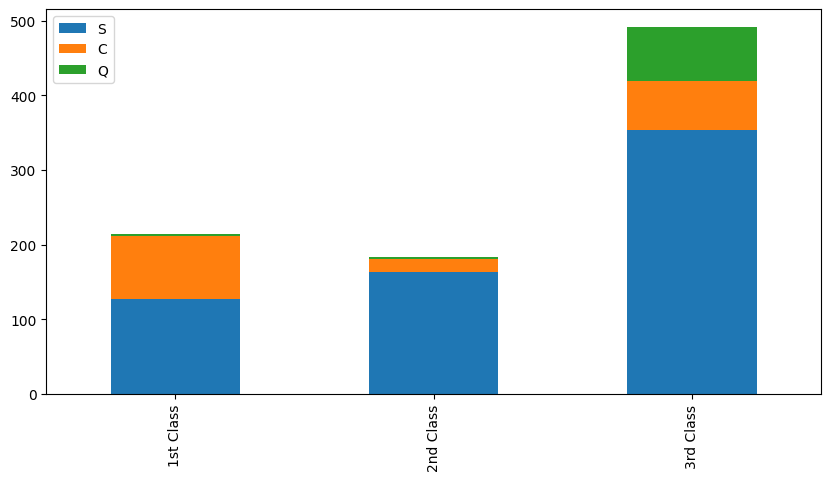

Pclass1:
 S    127
C     85
Q      2
Name: Embarked, dtype: int64
Pclass2:
 S    164
C     17
Q      3
Name: Embarked, dtype: int64
Pclass3:
 S    353
Q     72
C     66
Name: Embarked, dtype: int64


In [32]:
Pclass1 = data[data['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = data[data['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = data[data['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st Class','2nd Class','3rd Class']
df.plot(kind = 'bar', stacked =  True, figsize=(10,5))
plt.show()
print("Pclass1:\n",Pclass1)
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)

Majority of the persons from each Pclass are from 'S' Embarked

In [33]:
# filling the null valvues with 'S' in embarked column
data['Embarked']=data['Embarked'].fillna('S')

In [34]:
embarked_mapping = {'S':0,'C':1,'Q':2}
data['Embarked'] = data['Embarked'].map(embarked_mapping)

In [35]:
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,age_group
0,1,0,3,1,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,0,1,0,PC 17599,71.2833,C85,1,2,2
2,3,1,3,0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,2
3,4,1,1,0,1,0,113803,53.1000,C123,0,2,2
4,5,0,3,1,0,0,373450,8.0500,NaN,0,0,2


In [36]:
data["Fare"].fillna(data.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [37]:
data.head(30)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,age_group
0,1,0,3,1,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,0,1,0,PC 17599,71.2833,C85,1,2,2
2,3,1,3,0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,2
3,4,1,1,0,1,0,113803,53.1000,C123,0,2,2
4,5,0,3,1,0,0,373450,8.0500,NaN,0,0,2
5,6,0,3,1,0,0,330877,8.4583,NaN,2,0,2
6,7,0,1,1,0,0,17463,51.8625,E46,0,0,3
7,8,0,3,1,3,1,349909,21.0750,NaN,0,3,0
8,9,1,3,0,0,2,347742,11.1333,NaN,0,2,2
9,10,1,2,0,1,0,237736,30.0708,NaN,1,2,0


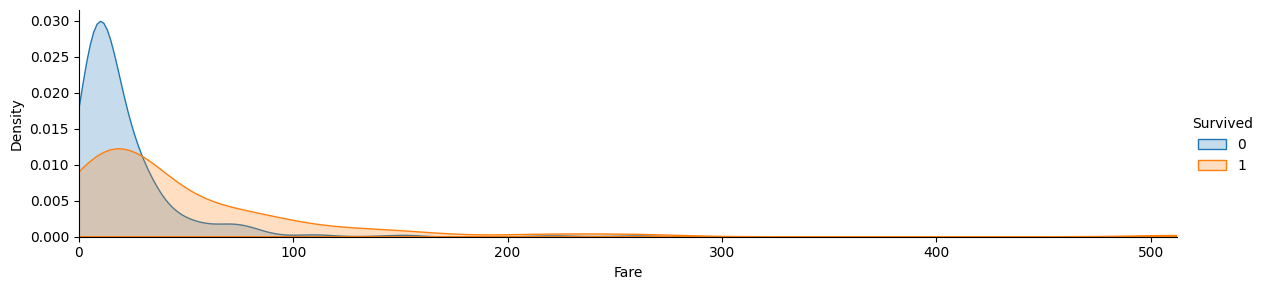

In [38]:
facet = sns.FacetGrid(data, hue="Survived",aspect=4 )
facet.map(sns.kdeplot, 'Fare', fill = True)
facet.set(xlim = (0, data['Fare'].max()))
facet.add_legend()
plt.show()

In [39]:
# Define the bin edges and labels
bin_edges = [0, 17, 30, 100, np.inf]
bin_labels = [0, 1, 2, 3]

# Apply pd.cut() to create the fare_group
data['fare_group'] = pd.cut(data['Fare'], bins=bin_edges, labels=bin_labels, right=False)

# Display the first few rows to verify the changes
print(data[['Fare', 'fare_group']].head())

      Fare fare_group
0   7.2500          0
1  71.2833          2
2   7.9250          0
3  53.1000          2
4   8.0500          0


In [40]:
data.drop('Fare',axis=1,inplace=True)

In [41]:
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Title,age_group,fare_group
0,1,0,3,1,1,0,A/5 21171,NaN,0,0,1,0
1,2,1,1,0,1,0,PC 17599,C85,1,2,2,2
2,3,1,3,0,0,0,STON/O2. 3101282,NaN,0,1,2,0
3,4,1,1,0,1,0,113803,C123,0,2,2,2
4,5,0,3,1,0,0,373450,NaN,0,0,2,0


In [42]:
data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [43]:
data['Cabin'] =  data['Cabin'].str[:1]

In [44]:
data['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

<Axes: >

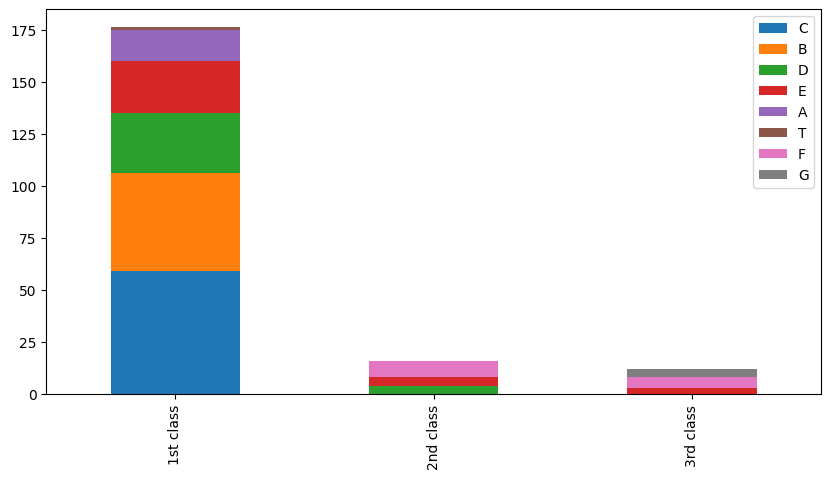

In [45]:
Pclass1 = data[data['Pclass']==1]['Cabin'].value_counts()
Pclass2 = data[data['Pclass']==2]['Cabin'].value_counts()
Pclass3 = data[data['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [46]:
cabin_mapping=({'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8})
data['Cabin'] = data['Cabin'].map(cabin_mapping)

In [47]:
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Title,age_group,fare_group
0,1,0,3,1,1,0,A/5 21171,NaN,0,0,1,0
1,2,1,1,0,1,0,PC 17599,0.8,1,2,2,2
2,3,1,3,0,0,0,STON/O2. 3101282,NaN,0,1,2,0
3,4,1,1,0,1,0,113803,0.8,0,2,2,2
4,5,0,3,1,0,0,373450,NaN,0,0,2,0


In [48]:
data["Cabin"].fillna(data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [49]:
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Title,age_group,fare_group
0,1,0,3,1,1,0,A/5 21171,2.0,0,0,1,0
1,2,1,1,0,1,0,PC 17599,0.8,1,2,2,2
2,3,1,3,0,0,0,STON/O2. 3101282,2.0,0,1,2,0
3,4,1,1,0,1,0,113803,0.8,0,2,2,2
4,5,0,3,1,0,0,373450,2.0,0,0,2,0


In [50]:
data.drop('Ticket',axis=1,inplace=True)

In [51]:
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,age_group,fare_group
0,1,0,3,1,1,0,2.0,0,0,1,0
1,2,1,1,0,1,0,0.8,1,2,2,2
2,3,1,3,0,0,0,2.0,0,1,2,0
3,4,1,1,0,1,0,0.8,0,2,2,2
4,5,0,3,1,0,0,2.0,0,0,2,0


## Modelling ##

In [52]:
feature= data[['Pclass','Sex','SibSp','Parch','Cabin','Embarked','Title','age_group','fare_group']]
survival= data['Survived']

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( feature,survival , test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(712, 9)
(179, 9)


In [54]:
y_train.value_counts()

0    439
1    273
Name: Survived, dtype: int64

In [55]:
y_test.value_counts()

0    110
1     69
Name: Survived, dtype: int64

In [56]:
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(x_train, y_train)
# Get the model coefficients and intercept
print(clf.coef_)
print(clf.intercept_)
# Get the predicted probabilities
train_preds = clf.predict_proba(x_train)
test_preds = clf.predict_proba(x_test)
# Get the predicted classes
train_class_preds = clf.predict(x_train)
test_class_preds = clf.predict(x_test)
# Get the accuracy scores
test_accuracy = accuracy_score(y_test,test_class_preds)
print("The accuracy on test data is ", test_accuracy)

[[-0.95907828 -1.8511742  -0.64920804 -0.30987274  0.33709116  0.18376001
   0.80397951 -0.56752166  0.2964843 ]]
[2.77665306]
The accuracy on test data is  0.7988826815642458


In [59]:
report = classification_report(y_test, test_class_preds)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       110
           1       0.72      0.78      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.80      0.80      0.80       179



In [60]:
clf1 = DecisionTreeClassifier()
clf1.fit(x_train, y_train)

# Get the predicted probabilities
train_preds = clf1.predict_proba(x_train)
test_preds = clf1.predict_proba(x_test)
# Get the predicted classes
train_class_preds = clf1.predict(x_train)
test_class_preds = clf1.predict(x_test)
# Get the accuracy scores
test_accuracy = accuracy_score(y_test,test_class_preds)
print("The accuracy on test data is ", test_accuracy)

The accuracy on test data is  0.8268156424581006


In [61]:
report = classification_report(y_test,test_class_preds)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.82      0.71      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



In [62]:

prediction = clf1.predict(x_test)
# test_data

In [63]:
prediction

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [64]:
x_test['Prediction']=prediction
x_test.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,age_group,fare_group,Prediction
495,3,1,0,0,2.0,1,0,2,0,0
648,3,1,0,0,2.0,0,0,2,0,0
278,3,1,4,1,2.0,2,3,0,1,0
31,1,0,1,0,0.4,1,2,2,3,1
255,3,0,0,2,2.0,1,2,2,0,0


## Using K-fold cross validation

In [68]:
from sklearn.model_selection import KFold
# Initialize K-Fold Cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
# Initialize a list to store the scores
scores_1 = []
scores_2 = []

# Iterate over the folds
for train_index, test_index in kf.split(feature):
    # Split the data into training and test sets
    X_train, X_test = feature.iloc[train_index], feature.iloc[test_index]
    y_train, y_test = survival.iloc[train_index], survival.iloc[test_index]

    # Initialize and train the model
    model_1 = LogisticRegression()
    model_1.fit(X_train, y_train)

    model_2 = DecisionTreeClassifier()
    model_2.fit(X_train, y_train)

    # Perform predictions on the test set
    y_pred_1 = model_1.predict(X_test)
    y_pred_2 = model_2.predict(X_test)

    # Calculate the accuracy score
    score_1 = accuracy_score(y_test, y_pred_1)
    score_2 = accuracy_score(y_test, y_pred_2)
    # Append the score to the list
    scores_1.append(score_1)
    scores_2.append(score_2)

# Calculate the average score
avg_score_m1 = sum(scores_1) / k
avg_score_m2 = sum(scores_2) / k


# Print the scores and average score
print("Scores:", scores_1)
print("Average Score of Logistic Regression model:", avg_score_m1)

print("Scores:", scores_2)
print("Average Score of Decision Tree Model:", avg_score_m2)

Scores: [0.7877094972067039, 0.8146067415730337, 0.8651685393258427, 0.7808988764044944, 0.848314606741573]
Average Score of Logistic Regression model: 0.8193396522503296
Scores: [0.8044692737430168, 0.8089887640449438, 0.8202247191011236, 0.7584269662921348, 0.8146067415730337]
Average Score of Decision Tree Model: 0.8013432929508506
